# 2° Capítulo do livro "Projetos de Ciência de Dados com Python" - Scikit-Learn

In [1]:
## bibliotecas iniciais

import pandas as pd
import numpy as np

In [2]:
## leitura dos dados

dados = pd.read_csv(r"C:\Users\pasch\Desktop\CURSOS\LIVRO_PROJETOS_C_DADOS_PYTHON\Projeto\cap1_data_limpo.csv")

print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')
dados.head()

O dataset contém 26664 linhas e 30 colunas


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


## Criando Dados Sintéticos

In [3]:
np.random.seed(1)
X =  np.random.uniform(low=0.0, high=10.0, size=(1000,))

slope = 0.25
intercept = -1.25
noise = np.random.normal(loc=0.0, scale = 1.0, size=(1000,))

y = slope * X + intercept + noise

### Checando os Dados Criados

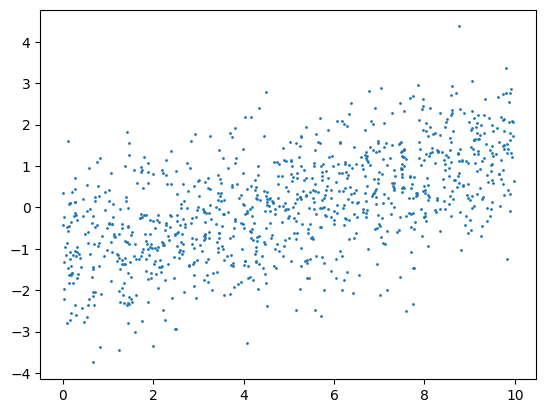

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=1)

Esses dados serão usados para entender um pouco mais sobre a Regressão

# Exercício 8 - Pg 79 - 2° Capítulo

## Regressão Linear - Scikit Learn

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  # modelo instanciodo no padrão
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [6]:
lr.fit(X.reshape(-1, 1), y)

lr.coef_, lr.intercept_

(array([0.25106337]), -1.208002189576312)

## Previsões

In [7]:
y_pred = lr.predict(X.reshape(-1,1))

y_pred[:10]

array([-0.16101268,  0.60046878, -1.20771504, -0.44895584, -0.8395519 ,
       -0.9761738 , -0.74037102, -0.34042577, -0.21186439,  0.14476928])

## Plotando Gráficos e Linha de Regressão

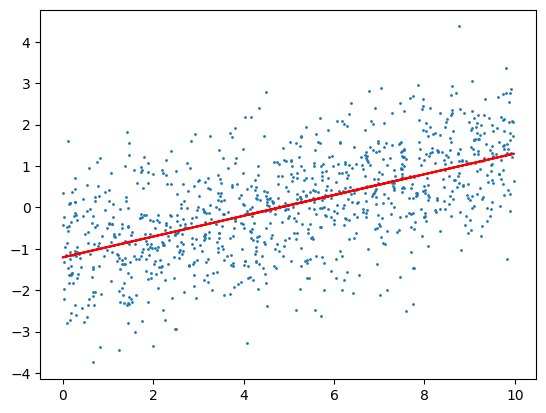

In [8]:
plt.scatter(X, y, s=1) # s é o tamanho das bolinhas
plt.plot(X, y_pred, 'r')

## Avaliação do Modelo

### Dividindo os Dados em Treino e Teste

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dados['EDUCATION'].values.reshape(-1, 1),
                                                    dados['default payment next month'].values,
                                                    test_size=0.2,
                                                    random_state=24)

In [10]:
np.mean(y_train), np.mean(y_test)

(0.223102526838873, 0.21657603600225014)

# Criando o Modelo

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()  ## instanciando o modelo
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)  ## previsões nos dados de teste

## Calculando a Acurácia

In [12]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Como saber se esse modelo é bom?

In [13]:
## calculo da acuracia

acc = np.mean(y_pred == y_test)
acc

0.7834239639977498

In [14]:
np.unique(y_pred)

array([0], dtype=int64)

#### Acurárcia está alta, indicando bom modelo, mas quando olhamos as previsões, ele não acerta as fraudes, ou seja, precisa de ajustes

## Matriz de Confusão

Base para cálculo de outras métricas

In [15]:
## são as combinações de resultados em uma matriz

TP = sum((y_pred==1)&(y_test==1))
TN = sum((y_pred==0)&(y_test==0))
FP = sum((y_pred==1)&(y_test==0))
FN = sum((y_pred==0)&(y_test==1))

TP, TN, FP, FN

(0, 4178, 0, 1155)

# Exercício 10

### 1 - predict.proba

In [16]:
lr.predict_proba(X_test)

array([[0.77460214, 0.22539786],
       [0.77460214, 0.22539786],
       [0.79040961, 0.20959039],
       ...,
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039]])

A primeira coluna diz sobre a probabilidade da pessoa ficar como 0, ou seja, não ficar inadimplente, enquanto que a segunda coluna fala sobre a pessoa se tornar inadimplente, com marcação 1

### 2 - Olhando a parte 'positiva'

In [18]:
pos_proba = lr.predict_proba(X_test)[:,1]
pos_proba

array([0.22539786, 0.22539786, 0.20959039, ..., 0.20959039, 0.20959039,
       0.20959039])

### 3 - Histograma

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.20959039, 0.2145797 , 0.21956901, 0.22455832, 0.22954762,
        0.23453693, 0.23952624, 0.24451555, 0.24950485, 0.25449416,
        0.25948347]),
 <BarContainer object of 10 artists>)

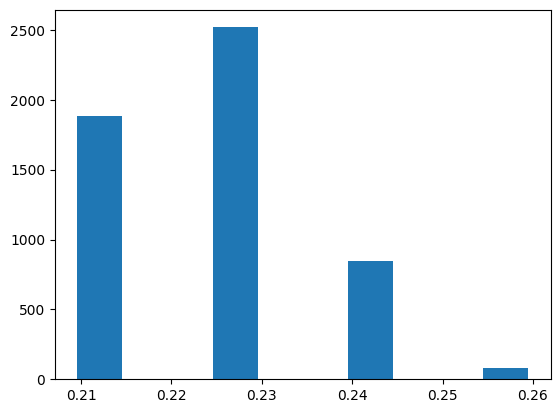

In [19]:
plt.hist(pos_proba)

Podemos ver que a distribuição dos valores da classe positiva estão muito abaixo de 0.5, ou seja, precisamos checar o threshold

### 4 - Isolar Probabilidades (Neg/pos)

In [20]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

### 5 - Histograma Empilhado

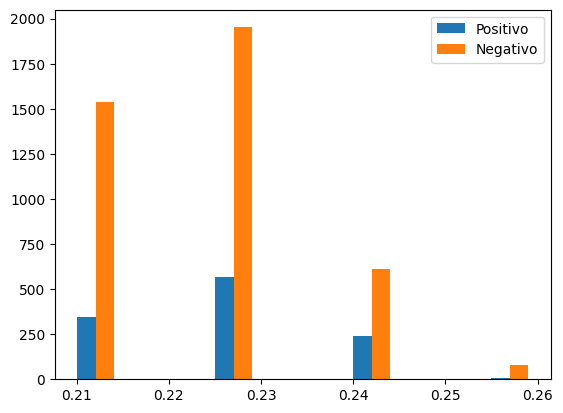

In [24]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba]);
plt.legend(['Positivo', 'Negativo'])

### 6 -  Curva ROC

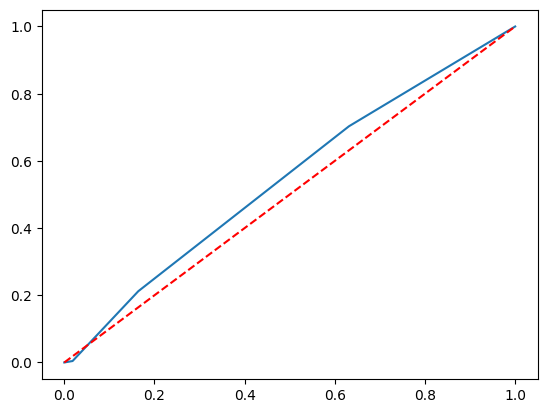

In [28]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '-')
plt.plot([0,1], [0,1], 'r--')

In [30]:
print(thresholds)

[       inf 0.25948347 0.24203246 0.22539786 0.20959039]
